In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,228 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['font.family']='NanumBarunGothic'

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filepath='/content/drive/MyDrive/비재무데이터_신용평가/data/'

# KOSIS - 생산자물가지수 

In [4]:
df_ppi=pd.read_csv(filepath+'생산자물가지수_기본분류(2015=100)_2018~.csv',encoding='cp949')
df_ppi

,계정코드별,시점,생산자물가지수(기본분류)
0,총지수,2018.01,102.52
1,총지수,2018.02,102.95
2,총지수,2018.03,102.91
3,총지수,2018.04,103.04
4,총지수,2018.05,103.34
...,...,...,...
28497,기타제조업제품,2022.02,112.64
28498,기타제조업제품,2022.03,112.81
28499,기타제조업제품,2022.04,119.30
28500,기타제조업제품,2022.05,119.52


In [5]:
df_ppi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28502 entries, 0 to 28501
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   계정코드별          28502 non-null  object 
 1   시점             28502 non-null  float64
 2   생산자물가지수(기본분류)  28502 non-null  float64
dtypes: float64(2), object(1)
memory usage: 668.1+ KB


In [6]:
def get_Ym(x):
  Ym=str(x).split('.')
  if Ym[1]=='1':
    result=Ym[0]+'-'+'10'
  else:
    result=Ym[0]+'-'+Ym[1]
  return result

In [7]:
df_ppi['시점']=df_ppi['시점'].apply(get_Ym)
df_ppi.head(12)

,계정코드별,시점,생산자물가지수(기본분류)
0,총지수,2018-01,102.52
1,총지수,2018-02,102.95
2,총지수,2018-03,102.91
3,총지수,2018-04,103.04
4,총지수,2018-05,103.34
5,총지수,2018-06,103.37
6,총지수,2018-07,103.85
7,총지수,2018-08,104.32
8,총지수,2018-09,104.62
9,총지수,2018-10,104.26


In [8]:
df_ppi['시점']=pd.to_datetime(df_ppi['시점'], infer_datetime_format=True)
df_ppi.head()

,계정코드별,시점,생산자물가지수(기본분류)
0,총지수,2018-01-01,102.52
1,총지수,2018-02-01,102.95
2,총지수,2018-03-01,102.91
3,총지수,2018-04-01,103.04
4,총지수,2018-05-01,103.34


In [9]:
df_ppi.set_index('시점', inplace=True)
df_ppi

,계정코드별,생산자물가지수(기본분류)
시점,,
2018-01-01,총지수,102.52
2018-02-01,총지수,102.95
2018-03-01,총지수,102.91
2018-04-01,총지수,103.04
2018-05-01,총지수,103.34
...,...,...
2022-02-01,기타제조업제품,112.64
2022-03-01,기타제조업제품,112.81
2022-04-01,기타제조업제품,119.30


In [ ]:
# 2020~ 데이터만 사용
# df_ppi=df_ppi.loc['2020':]
# df_ppi

,계정코드별,생산자물가지수(기본분류)
시점,,
2020-01-01,총지수,104.08
2020-02-01,총지수,103.74
2020-03-01,총지수,102.82
2020-04-01,총지수,101.93
2020-05-01,총지수,101.96
...,...,...
2022-02-01,기타제조업제품,112.64
2022-03-01,기타제조업제품,112.81
2022-04-01,기타제조업제품,119.30


In [10]:
df_ppi_overall=df_ppi[df_ppi['계정코드별']=='총지수']
df_ppi_overall.drop('계정코드별',axis=1, inplace=True)
df_ppi_overall

,생산자물가지수(기본분류)
시점,
2018-01-01,102.52
2018-02-01,102.95
2018-03-01,102.91
2018-04-01,103.04
2018-05-01,103.34
2018-06-01,103.37
2018-07-01,103.85
2018-08-01,104.32
2018-09-01,104.62


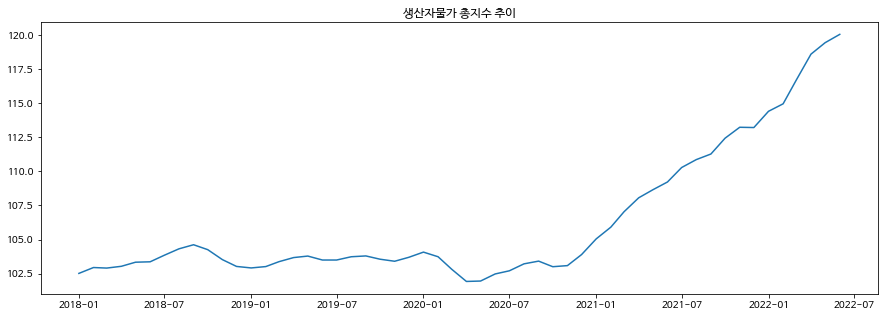

In [11]:
plt.figure(figsize=(15,5))
plt.plot(df_ppi_overall)
plt.title('생산자물가 총지수 추이')
plt.show()

In [12]:
# 물가지수 top50
top50=df_ppi.nlargest(50,'생산자물가지수(기본분류)',keep='all')
top50

,계정코드별,생산자물가지수(기본분류)
시점,,
2022-06-01,신선연체류,304.99
2022-05-01,신선연체류,304.42
2022-04-01,신선연체류,300.03
2019-12-01,신선연체류,295.36
2020-01-01,신선연체류,295.36
2020-02-01,신선연체류,295.36
2020-03-01,신선연체류,295.36
2020-04-01,신선연체류,295.36
2020-05-01,신선연체류,295.36


In [13]:
pd.unique(top50['계정코드별'])

array(['신선연체류', '기타비금속광물', '경유', '중후판(두께3mm이상)', '등유', '제트유',
       '기타비철금속제련,정련및합금제품', '휘발유'], dtype=object)

**[생산자물가가 가장 높은 3개 그룹]**
- Group1(신선연체류) - '신선연체류'
- Group2(비금속,비철금속) - '기타비금속광물', '중후판(두께3mm이상)', '기타비철금속제련,정련및합금제품'
- Group3(석유제품) - '경유', '등유', '제트유', '휘발유'

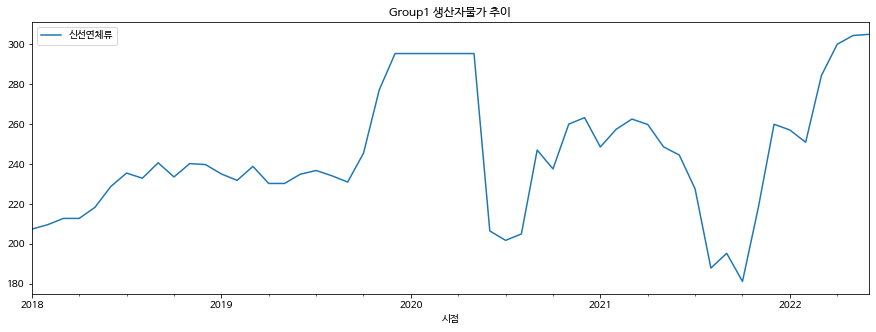

In [14]:
# df - Group1

df_G1=df_ppi[df_ppi['계정코드별']=='신선연체류']
df_G1.drop('계정코드별', axis=1, inplace=True)
df_G1.columns=['신선연체류']

# 시각화
df_G1.plot(figsize=(15,5), legend=True)
plt.title('Group1 생산자물가 추이')
plt.show()

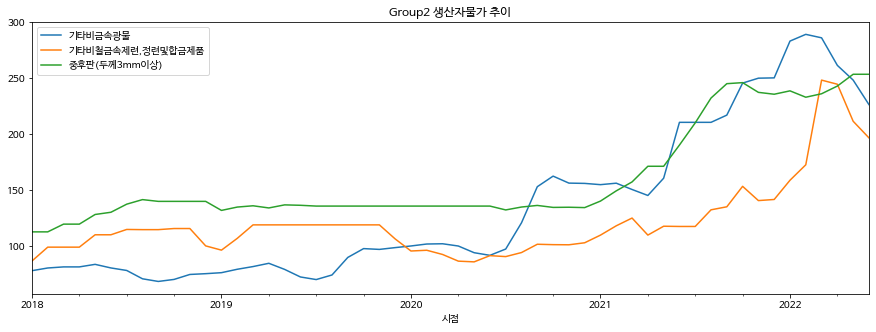

In [15]:
# df - Group2

df_nonmetalMineral=df_ppi[df_ppi['계정코드별']=='기타비금속광물']
df_nonmetalMineral.drop('계정코드별', axis=1, inplace=True)
df_nonmetalMineral.columns=['기타비금속광물']

df_nonmetalAlloy=df_ppi[df_ppi['계정코드별']=='기타비철금속제련,정련및합금제품']
df_nonmetalAlloy.drop('계정코드별', axis=1, inplace=True)
df_nonmetalAlloy.columns=['기타비철금속제련,정련및합금제품']

df_medHeavyPlate=df_ppi[df_ppi['계정코드별']=='중후판(두께3mm이상)']
df_medHeavyPlate.drop('계정코드별', axis=1, inplace=True)
df_medHeavyPlate.columns=['중후판(두께3mm이상)']

df_G2=pd.merge(df_nonmetalMineral,df_nonmetalAlloy,on='시점')
df_G2=pd.merge(df_G2,df_medHeavyPlate,on='시점')

# 시각화
df_G2.plot(figsize=(15,5), legend=True)
plt.title('Group2 생산자물가 추이')
plt.show()

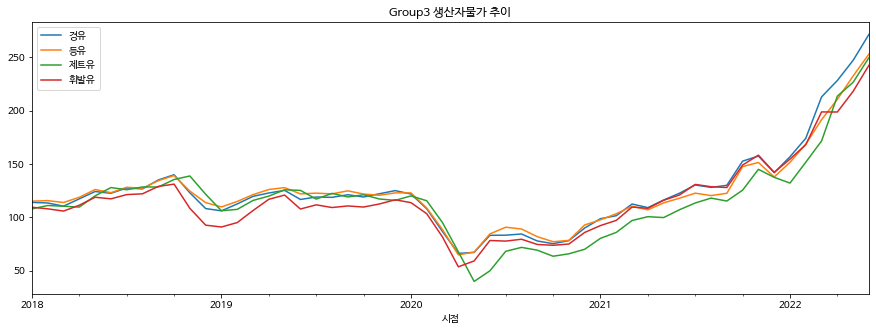

In [16]:
# df - Group3

df_diesel=df_ppi[df_ppi['계정코드별']=='경유']
df_diesel.drop('계정코드별', axis=1, inplace=True)
df_diesel.columns=['경유']

df_lampoil=df_ppi[df_ppi['계정코드별']=='등유']
df_lampoil.drop('계정코드별', axis=1, inplace=True)
df_lampoil.columns=['등유']

df_jet=df_ppi[df_ppi['계정코드별']=='제트유']
df_jet.drop('계정코드별', axis=1, inplace=True)
df_jet.columns=['제트유']

df_gasoline=df_ppi[df_ppi['계정코드별']=='휘발유']
df_gasoline.drop('계정코드별', axis=1, inplace=True)
df_gasoline.columns=['휘발유']

df_G3=pd.merge(df_diesel,df_lampoil,on='시점')
df_G3=pd.merge(df_G3,df_jet,on='시점')
df_G3=pd.merge(df_G3,df_gasoline,on='시점')

# 시각화
df_G3.plot(figsize=(15,5), legend=True)
plt.title('Group3 생산자물가 추이')
plt.show()

생산자물가 지수가 가장 높은 품목을 3개 그룹으로 분류하여 시각화 한 결과
- 그룹1은 5년간 높은 평균을 유지하나 변동 주기와 폭이 큼. 21년 말부터 다시 급등
- 그룹2는 2020년까지는 지수 100 부근의 높지 않은 수치였으나 21년부터 급등 후 2022년 들어서면서 약간 하락세
- 그룹3은 유가에 직접적으로 영향을 받는 품목들로 2020년 팬데믹 선언으로 급락했다가 바로 상승 전환했으며 2022년 들어서 더욱 가파르게 급등  

# KOSIS - KOSPI 산업별 주가 지수 
- [기준시점] 1980.1.4 = 100 
- [기준시점] 의료정밀, 전기가스업, 통신업, 서비스업 지수 : 2000.1.4 = 1,000


In [17]:
df_indIndex=pd.read_csv(filepath+'코스피_산업별_주가지수_2018~.csv',encoding='cp949')
df_indIndex

,시점,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
0,2018.01,5793.32,4519.07,307.05,337.45,6385.57,14179.41,1524.83,5783.55,999.13,...,498.56,1135.90,113.87,1517.66,376.42,577.19,339.49,2402.75,22296.29,1362.90
1,2018.02,5565.65,4208.97,279.95,344.71,6074.11,14839.06,1369.28,5489.57,918.11,...,456.76,1062.04,101.87,1461.37,342.15,540.16,341.29,2122.54,21048.96,1228.52
2,2018.03,5634.00,4273.76,285.77,374.29,6097.05,14672.94,1376.07,5067.77,930.80,...,473.60,1061.96,107.74,1509.77,340.61,525.55,303.33,2075.89,19773.83,1267.30
3,2018.04,5836.45,4451.48,298.91,399.69,6187.08,13863.89,1695.15,5542.42,964.35,...,489.91,1192.37,136.84,1607.39,338.14,529.81,331.24,2162.58,19671.63,1212.98
4,2018.05,5676.43,4436.98,307.39,452.77,5882.77,13284.62,2030.56,5227.38,978.42,...,471.58,1105.54,145.69,1463.05,327.29,495.59,311.93,2126.55,18032.94,1159.61
5,2018.06,5389.21,4628.44,312.88,406.30,5792.04,13320.24,1686.87,4875.56,871.59,...,459.65,1090.73,120.47,1341.21,347.48,481.59,320.42,1933.03,17805.02,1177.06
6,2018.07,5323.39,4332.49,298.93,385.94,5675.43,12281.44,1644.04,4898.49,855.53,...,431.65,1099.88,120.04,1378.95,370.21,475.12,329.31,1810.88,17914.73,1147.92
7,2018.08,5449.32,4063.70,327.50,444.00,5625.06,13665.52,1796.92,4877.01,876.74,...,429.76,1011.30,121.21,1325.65,385.19,468.03,316.50,1849.16,17178.26,1175.72
8,2018.09,5393.59,4077.32,320.06,437.57,5600.71,14878.96,1896.78,4713.97,925.36,...,452.20,1010.99,125.98,1365.18,416.70,491.16,325.61,1915.34,18265.86,1176.32
9,2018.10,4629.03,3665.33,257.27,351.07,4646.56,10867.84,1495.08,3972.97,736.80,...,378.12,919.84,97.27,1234.62,387.57,438.85,309.62,1587.19,17269.98,1017.88


In [18]:
df_indIndex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      54 non-null     float64
 1   제조업     54 non-null     float64
 2   음식료품    54 non-null     float64
 3   섬유의복    54 non-null     float64
 4   종이목재    54 non-null     float64
 5   화학      54 non-null     float64
 6   의약품     54 non-null     float64
 7   비금속광물   54 non-null     float64
 8   철강금속    54 non-null     float64
 9   기계      54 non-null     float64
 10  전기전자    54 non-null     float64
 11  의료정밀    54 non-null     float64
 12  운수장비    54 non-null     float64
 13  유통업     54 non-null     float64
 14  전기가스업   54 non-null     float64
 15  건설업     54 non-null     float64
 16  운수창고업   54 non-null     float64
 17  통신업     54 non-null     float64
 18  금융업     54 non-null     float64
 19  은행      54 non-null     float64
 20  증권      54 non-null     float64
 21  보험      54 non-null     float64
 22  서비스업

In [19]:
df_indIndex['시점']=df_indIndex['시점'].apply(get_Ym)
df_indIndex.head(12)

,시점,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
0,2018-01,5793.32,4519.07,307.05,337.45,6385.57,14179.41,1524.83,5783.55,999.13,...,498.56,1135.90,113.87,1517.66,376.42,577.19,339.49,2402.75,22296.29,1362.90
1,2018-02,5565.65,4208.97,279.95,344.71,6074.11,14839.06,1369.28,5489.57,918.11,...,456.76,1062.04,101.87,1461.37,342.15,540.16,341.29,2122.54,21048.96,1228.52
2,2018-03,5634.00,4273.76,285.77,374.29,6097.05,14672.94,1376.07,5067.77,930.80,...,473.60,1061.96,107.74,1509.77,340.61,525.55,303.33,2075.89,19773.83,1267.30
3,2018-04,5836.45,4451.48,298.91,399.69,6187.08,13863.89,1695.15,5542.42,964.35,...,489.91,1192.37,136.84,1607.39,338.14,529.81,331.24,2162.58,19671.63,1212.98
4,2018-05,5676.43,4436.98,307.39,452.77,5882.77,13284.62,2030.56,5227.38,978.42,...,471.58,1105.54,145.69,1463.05,327.29,495.59,311.93,2126.55,18032.94,1159.61
5,2018-06,5389.21,4628.44,312.88,406.30,5792.04,13320.24,1686.87,4875.56,871.59,...,459.65,1090.73,120.47,1341.21,347.48,481.59,320.42,1933.03,17805.02,1177.06
6,2018-07,5323.39,4332.49,298.93,385.94,5675.43,12281.44,1644.04,4898.49,855.53,...,431.65,1099.88,120.04,1378.95,370.21,475.12,329.31,1810.88,17914.73,1147.92
7,2018-08,5449.32,4063.70,327.50,444.00,5625.06,13665.52,1796.92,4877.01,876.74,...,429.76,1011.30,121.21,1325.65,385.19,468.03,316.50,1849.16,17178.26,1175.72
8,2018-09,5393.59,4077.32,320.06,437.57,5600.71,14878.96,1896.78,4713.97,925.36,...,452.20,1010.99,125.98,1365.18,416.70,491.16,325.61,1915.34,18265.86,1176.32
9,2018-10,4629.03,3665.33,257.27,351.07,4646.56,10867.84,1495.08,3972.97,736.80,...,378.12,919.84,97.27,1234.62,387.57,438.85,309.62,1587.19,17269.98,1017.88


In [20]:
df_indIndex['시점']=pd.to_datetime(df_indIndex['시점'], infer_datetime_format=True)
df_indIndex.head()

,시점,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
0,2018-01-01,5793.32,4519.07,307.05,337.45,6385.57,14179.41,1524.83,5783.55,999.13,...,498.56,1135.90,113.87,1517.66,376.42,577.19,339.49,2402.75,22296.29,1362.90
1,2018-02-01,5565.65,4208.97,279.95,344.71,6074.11,14839.06,1369.28,5489.57,918.11,...,456.76,1062.04,101.87,1461.37,342.15,540.16,341.29,2122.54,21048.96,1228.52
2,2018-03-01,5634.00,4273.76,285.77,374.29,6097.05,14672.94,1376.07,5067.77,930.80,...,473.60,1061.96,107.74,1509.77,340.61,525.55,303.33,2075.89,19773.83,1267.30
3,2018-04-01,5836.45,4451.48,298.91,399.69,6187.08,13863.89,1695.15,5542.42,964.35,...,489.91,1192.37,136.84,1607.39,338.14,529.81,331.24,2162.58,19671.63,1212.98
4,2018-05-01,5676.43,4436.98,307.39,452.77,5882.77,13284.62,2030.56,5227.38,978.42,...,471.58,1105.54,145.69,1463.05,327.29,495.59,311.93,2126.55,18032.94,1159.61


In [21]:
df_indIndex.set_index('시점', inplace=True)
df_indIndex.head()

,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
시점,,,,,,,,,,,,,,,,,,,,,
2018-01-01,5793.32,4519.07,307.05,337.45,6385.57,14179.41,1524.83,5783.55,999.13,18489.76,...,498.56,1135.90,113.87,1517.66,376.42,577.19,339.49,2402.75,22296.29,1362.90
2018-02-01,5565.65,4208.97,279.95,344.71,6074.11,14839.06,1369.28,5489.57,918.11,17588.77,...,456.76,1062.04,101.87,1461.37,342.15,540.16,341.29,2122.54,21048.96,1228.52
2018-03-01,5634.00,4273.76,285.77,374.29,6097.05,14672.94,1376.07,5067.77,930.80,18430.64,...,473.60,1061.96,107.74,1509.77,340.61,525.55,303.33,2075.89,19773.83,1267.30
2018-04-01,5836.45,4451.48,298.91,399.69,6187.08,13863.89,1695.15,5542.42,964.35,19472.10,...,489.91,1192.37,136.84,1607.39,338.14,529.81,331.24,2162.58,19671.63,1212.98
2018-05-01,5676.43,4436.98,307.39,452.77,5882.77,13284.62,2030.56,5227.38,978.42,19184.98,...,471.58,1105.54,145.69,1463.05,327.29,495.59,311.93,2126.55,18032.94,1159.61


In [22]:
df_indIndex.columns

Index(['제조업', '음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계',
       '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업', '금융업',
       '은행', '증권', '보험', '서비스업'],
      dtype='object')

In [23]:
df_indIndex.columns.size # 22개 산업군

22

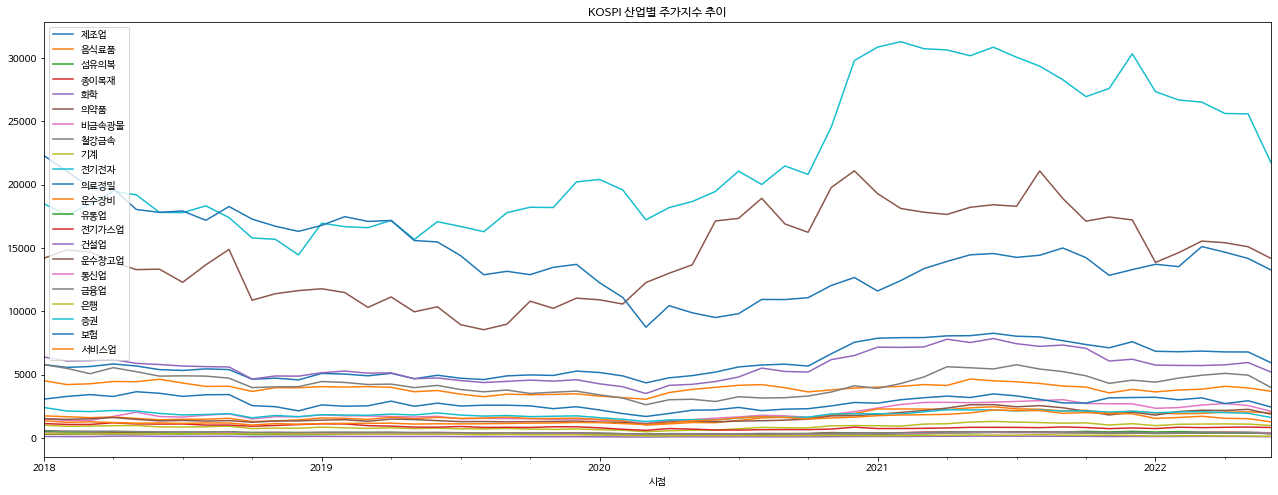

In [24]:
df_indIndex.plot(figsize=(22,8))
plt.legend(loc='upper left')
plt.title('KOSPI 산업별 주가지수 추이')
plt.show()

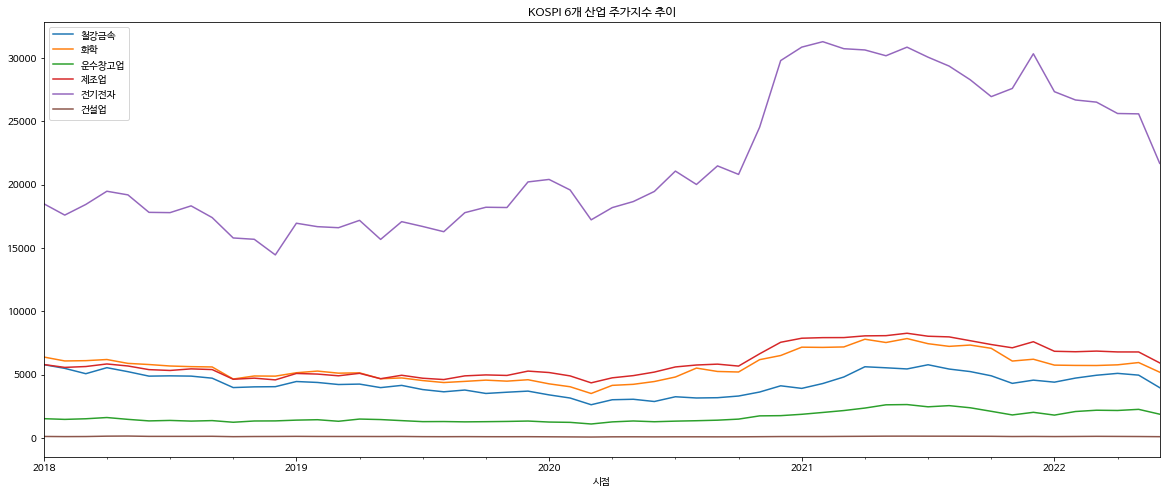

In [25]:
df_ind6Index=df_indIndex[['철강금속','화학','운수창고업','제조업','전기전자','건설업']]

df_ind6Index.plot(figsize=(20,8))
plt.legend(loc='upper left')
plt.title('KOSPI 6개 산업 주가지수 추이')
plt.show()

# 한국은행 환율

In [26]:
df_KrwUsd=pd.read_csv(filepath+'원달러환율_2013~.csv',thousands=',')
df_KrwUsd

,변환,원자료
0,2013/01/02,1071.1
1,2013/01/03,1064.7
2,2013/01/04,1063.8
3,2013/01/07,1064.1
4,2013/01/08,1063.4
...,...,...
2373,2022/08/10,1305.1
2374,2022/08/11,1309.1
2375,2022/08/12,1302.5
2376,2022/08/16,1303.1


In [27]:
df_KrwUsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변환      2378 non-null   object 
 1   원자료     2378 non-null   float64
dtypes: float64(1), object(1)
memory usage: 37.3+ KB


In [28]:
df_KrwUsd.rename(columns={'변환':'시점', '원자료':'원달러환율'},inplace=True) 
df_KrwUsd.head()

,시점,원달러환율
0,2013/01/02,1071.1
1,2013/01/03,1064.7
2,2013/01/04,1063.8
3,2013/01/07,1064.1
4,2013/01/08,1063.4


In [29]:
df_KrwUsd['시점']=pd.to_datetime(df_KrwUsd['시점'], infer_datetime_format=True)
df_KrwUsd.head()

,시점,원달러환율
0,2013-01-02,1071.1
1,2013-01-03,1064.7
2,2013-01-04,1063.8
3,2013-01-07,1064.1
4,2013-01-08,1063.4


In [30]:
df_KrwUsd.set_index('시점', inplace=True)
df_KrwUsd.head()

,원달러환율
시점,
2013-01-02,1071.1
2013-01-03,1064.7
2013-01-04,1063.8
2013-01-07,1064.1
2013-01-08,1063.4


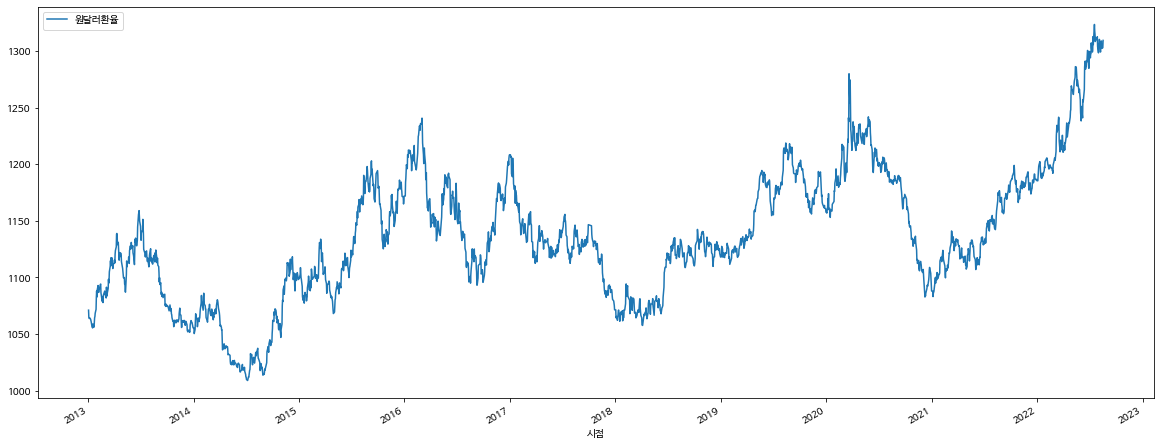

In [31]:
df_KrwUsd.plot(figsize=(20,8))
plt.show()

In [32]:
df_KrwUsd_since18=df_KrwUsd.loc['2018':]
df_KrwUsd_since18

,원달러환율
시점,
2018-01-02,1071.4
2018-01-03,1064.3
2018-01-04,1065.4
2018-01-05,1065.5
2018-01-08,1062.1
...,...
2022-08-10,1305.1
2022-08-11,1309.1
2022-08-12,1302.5


# 유가

In [33]:
df_oil=pd.read_csv(filepath+'국제유가_도입현황_2018~.csv',encoding='cp949')
df_oil

,시점,국제유가(Dubai) (US$/배럴),도입단가 (US$/배럴),도입물량 (백만배럴)
0,2018.01,66.2,64.7,99.8
1,2018.02,62.7,67.8,94.4
2,2018.03,62.7,64.4,82.8
3,2018.04,68.3,65.9,87.2
4,2018.05,74.4,70.3,95.2
5,2018.06,73.6,74.6,98.0
6,2018.07,73.1,75.2,96.7
7,2018.08,72.5,77.4,92.2
8,2018.09,77.2,77.0,79.7
9,2018.10,79.4,80.0,97.8


In [34]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   시점                    54 non-null     float64
 1   국제유가(Dubai) (US$/배럴)  54 non-null     float64
 2   도입단가 (US$/배럴)         54 non-null     float64
 3   도입물량 (백만배럴)           54 non-null     float64
dtypes: float64(4)
memory usage: 1.8 KB


In [35]:
df_oil['시점']=df_oil['시점'].apply(get_Ym)
df_oil.head(12)

,시점,국제유가(Dubai) (US$/배럴),도입단가 (US$/배럴),도입물량 (백만배럴)
0,2018-01,66.2,64.7,99.8
1,2018-02,62.7,67.8,94.4
2,2018-03,62.7,64.4,82.8
3,2018-04,68.3,65.9,87.2
4,2018-05,74.4,70.3,95.2
5,2018-06,73.6,74.6,98.0
6,2018-07,73.1,75.2,96.7
7,2018-08,72.5,77.4,92.2
8,2018-09,77.2,77.0,79.7
9,2018-10,79.4,80.0,97.8


In [36]:
df_oil['시점']=pd.to_datetime(df_oil['시점'], infer_datetime_format=True)
df_oil.head()

,시점,국제유가(Dubai) (US$/배럴),도입단가 (US$/배럴),도입물량 (백만배럴)
0,2018-01-01,66.2,64.7,99.8
1,2018-02-01,62.7,67.8,94.4
2,2018-03-01,62.7,64.4,82.8
3,2018-04-01,68.3,65.9,87.2
4,2018-05-01,74.4,70.3,95.2


In [37]:
df_oil.set_index('시점', inplace=True)
df_oil.head()

,국제유가(Dubai) (US$/배럴),도입단가 (US$/배럴),도입물량 (백만배럴)
시점,,,
2018-01-01,66.2,64.7,99.8
2018-02-01,62.7,67.8,94.4
2018-03-01,62.7,64.4,82.8
2018-04-01,68.3,65.9,87.2
2018-05-01,74.4,70.3,95.2


In [38]:
df_oil.drop(['도입단가 (US$/배럴)', '도입물량 (백만배럴)'], axis=1, inplace=True)
df_oil.rename(columns={'국제유가(Dubai) (US$/배럴)':'국제유가(Dubai)'}, inplace=True)
df_oil.tail()

,국제유가(Dubai)
시점,
2022-02-01,92.4
2022-03-01,110.9
2022-04-01,102.8
2022-05-01,108.2
2022-06-01,113.3


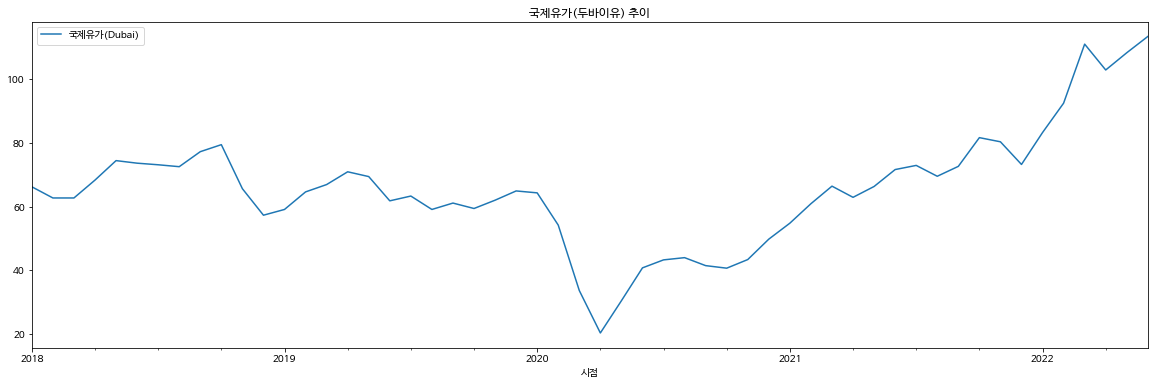

In [39]:
df_oil.plot(figsize=(20,6))
plt.title('국제유가(두바이유) 추이')
plt.show()

# 비철금속광물 원자재 가격

In [ ]:
import os
from glob import glob

def read_csv_by_dir(path):
    df_raw = pd.DataFrame()
    for files in os.listdir(path):
        if files.endswith('.csv'):
            df = pd.read_csv('/'.join([path,files]), thousands=',')
            df.dropna(axis=1, how='all')
        df_raw = pd.concat([df_raw,df], axis=1)
    return df_raw

In [ ]:
df_minerals=read_csv_by_dir(filepath+'base_mineral_prices')
df_minerals.head()

,기준일,연,기준일,동,기준일,니켈,기준일,아연,기준일,알루미늄,기준일,주석
0,2018-01-02,2544.0,2018-01-02,7181.0,2018-01-02,12690.0,2018-01-02,3377.0,2018-01-02,2256.0,2018-01-02,20160.0
1,2018-01-03,2580.0,2018-01-03,7115.5,2018-01-03,12465.0,2018-01-03,3350.5,2018-01-03,2241.0,2018-01-03,20050.0
2,2018-01-04,2573.0,2018-01-04,7202.5,2018-01-04,12615.0,2018-01-04,3377.0,2018-01-04,2230.0,2018-01-04,20075.0
3,2018-01-05,2590.0,2018-01-05,7097.0,2018-01-05,12500.0,2018-01-05,3396.0,2018-01-05,2205.5,2018-01-05,20020.0
4,2018-01-08,2566.0,2018-01-08,7084.5,2018-01-08,12450.0,2018-01-08,3391.5,2018-01-08,2177.5,2018-01-08,19960.0


In [ ]:
df_temp1=df_minerals.iloc[:,0]
df_temp2=df_minerals[['니켈','동','아연','알루미늄','연','주석']]
df_minerals=pd.concat([df_temp1,df_temp2], axis=1)
df_minerals.head()

,기준일,니켈,동,아연,알루미늄,연,주석
0,2018-01-02,12690.0,7181.0,3377.0,2256.0,2544.0,20160.0
1,2018-01-03,12465.0,7115.5,3350.5,2241.0,2580.0,20050.0
2,2018-01-04,12615.0,7202.5,3377.0,2230.0,2573.0,20075.0
3,2018-01-05,12500.0,7097.0,3396.0,2205.5,2590.0,20020.0
4,2018-01-08,12450.0,7084.5,3391.5,2177.5,2566.0,19960.0


In [ ]:
df_minerals.rename(columns={'기준일':'시점'},inplace=True)
df_minerals['시점']=pd.to_datetime(df_minerals['시점'])
df_minerals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시점      1170 non-null   datetime64[ns]
 1   니켈      1170 non-null   float64       
 2   동       1170 non-null   float64       
 3   아연      1170 non-null   float64       
 4   알루미늄    1170 non-null   float64       
 5   연       1170 non-null   float64       
 6   주석      1170 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 64.1 KB


In [ ]:
df_minerals.set_index('시점', inplace=True)
df_minerals.tail()

,니켈,동,아연,알루미늄,연,주석
시점,,,,,,
2022-08-11,23110.0,8140.0,3727.0,2498.0,2185.5,24875.0
2022-08-12,23225.0,8065.0,3672.0,2468.5,2176.0,25010.0
2022-08-15,21850.0,7865.5,3621.0,2389.5,2175.0,24300.0
2022-08-16,22500.0,7992.0,3877.0,2442.0,2192.0,24995.0
2022-08-17,22035.0,7955.0,3635.5,2414.0,2141.0,24950.0


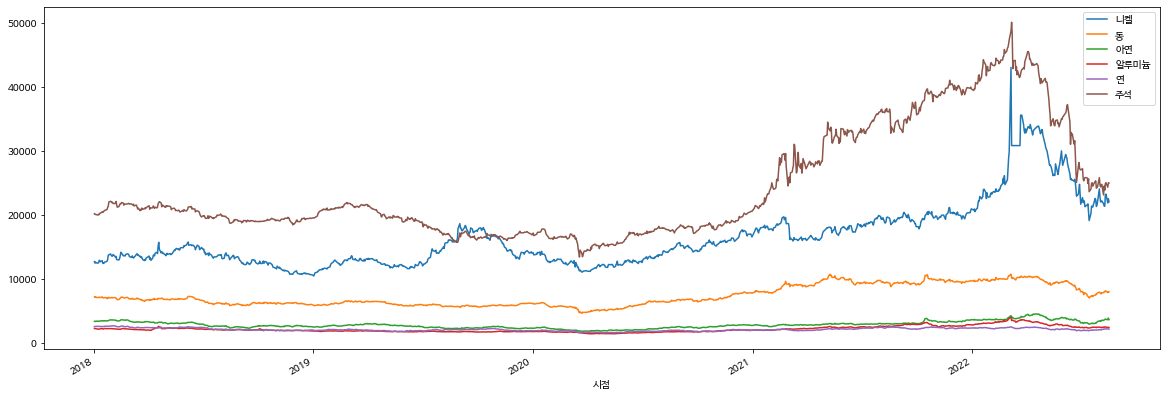

In [ ]:
df_minerals.plot(figsize=(20,7), legend=True)
plt.show()

# 상관관계
1. correlation
2. 환율, 원자재(비금속광물가격) -- KOSPI 비금속광물 주가 지수
3. 환율, 유가 -- KOSPI 화학, 운수창고 주가 지수

## 1. correlation

In [60]:
df_overall=pd.merge(df_G1,df_G2, on='시점')
df_overall=pd.merge(df_overall,df_G3, on='시점')
df_overall=pd.merge(df_overall,df_ind6Index, on='시점')
df_overall=pd.merge(df_overall,df_KrwUsd_since18, on='시점')
df_overall=pd.merge(df_overall,df_oil, on='시점')
df_overall=pd.merge(df_overall,df_minerals, on='시점')
df_overall.tail()

,신선연체류,기타비금속광물,"기타비철금속제련,정련및합금제품",중후판(두께3mm이상),경유,등유,제트유,휘발유,철강금속,화학,...,전기전자,건설업,원달러환율,국제유가(Dubai),니켈,동,아연,알루미늄,연,주석
시점,,,,,,,,,,,,,,,,,,,,,
2021-09-01,195.18,217.21,135.33,245.29,130.11,122.64,115.39,128.06,5235.73,7328.99,...,28273.96,130.08,1162.8,72.6,19541.0,9312.0,2977.5,2667.5,2400.0,34129.0
2021-10-01,181.07,245.81,153.60,246.22,152.76,147.63,125.58,149.13,4902.00,7071.52,...,26942.54,125.71,1185.2,81.6,18125.0,9113.0,2999.0,2865.0,2155.0,35600.0
2021-11-01,218.00,250.20,140.87,237.53,157.56,151.53,145.10,158.38,4305.36,6066.63,...,27587.28,108.52,1169.6,80.3,19650.0,9875.0,3430.0,2713.0,2440.0,38550.0
2021-12-01,259.90,250.47,141.86,235.86,141.97,137.93,137.61,142.28,4558.75,6210.01,...,30325.09,115.08,1187.7,73.2,20410.0,9571.0,3296.0,2669.5,2325.0,39950.0
2022-04-01,300.03,261.62,244.79,243.17,228.39,210.69,213.72,198.84,5094.03,5768.16,...,25609.41,116.09,1210.7,102.8,32800.0,10247.0,4332.0,3483.0,2447.0,44500.0


<Figure size 1800x1800 with 0 Axes>

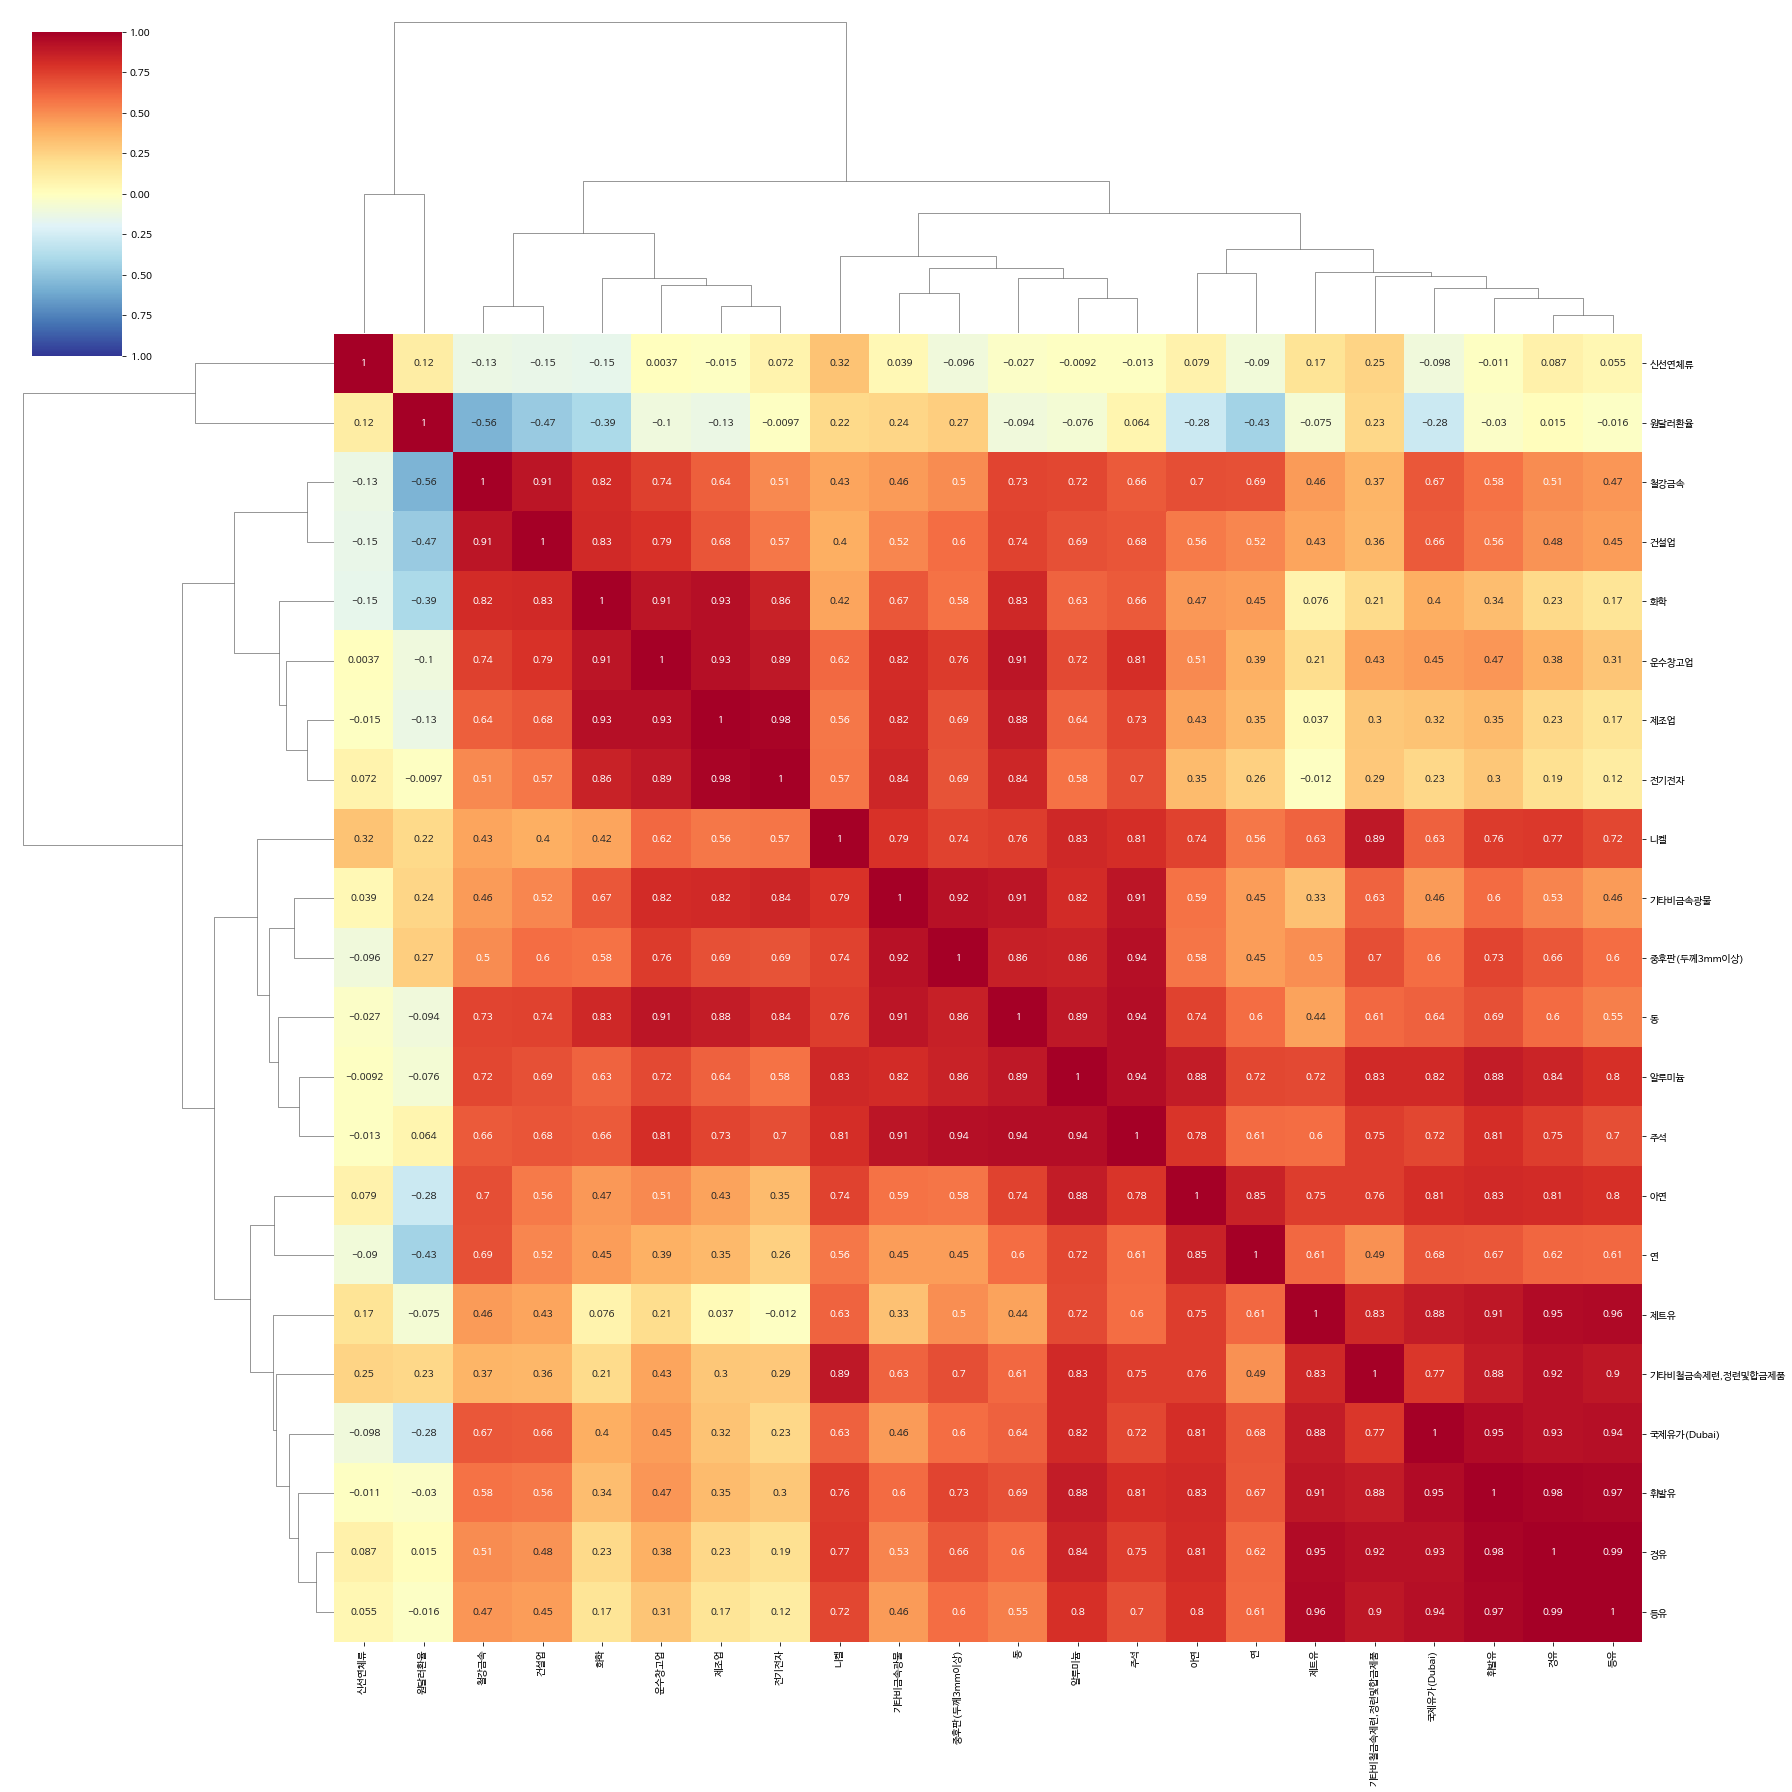

In [63]:
sns.clustermap(df_overall.corr(), figsize=(25,25), annot=True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.show()

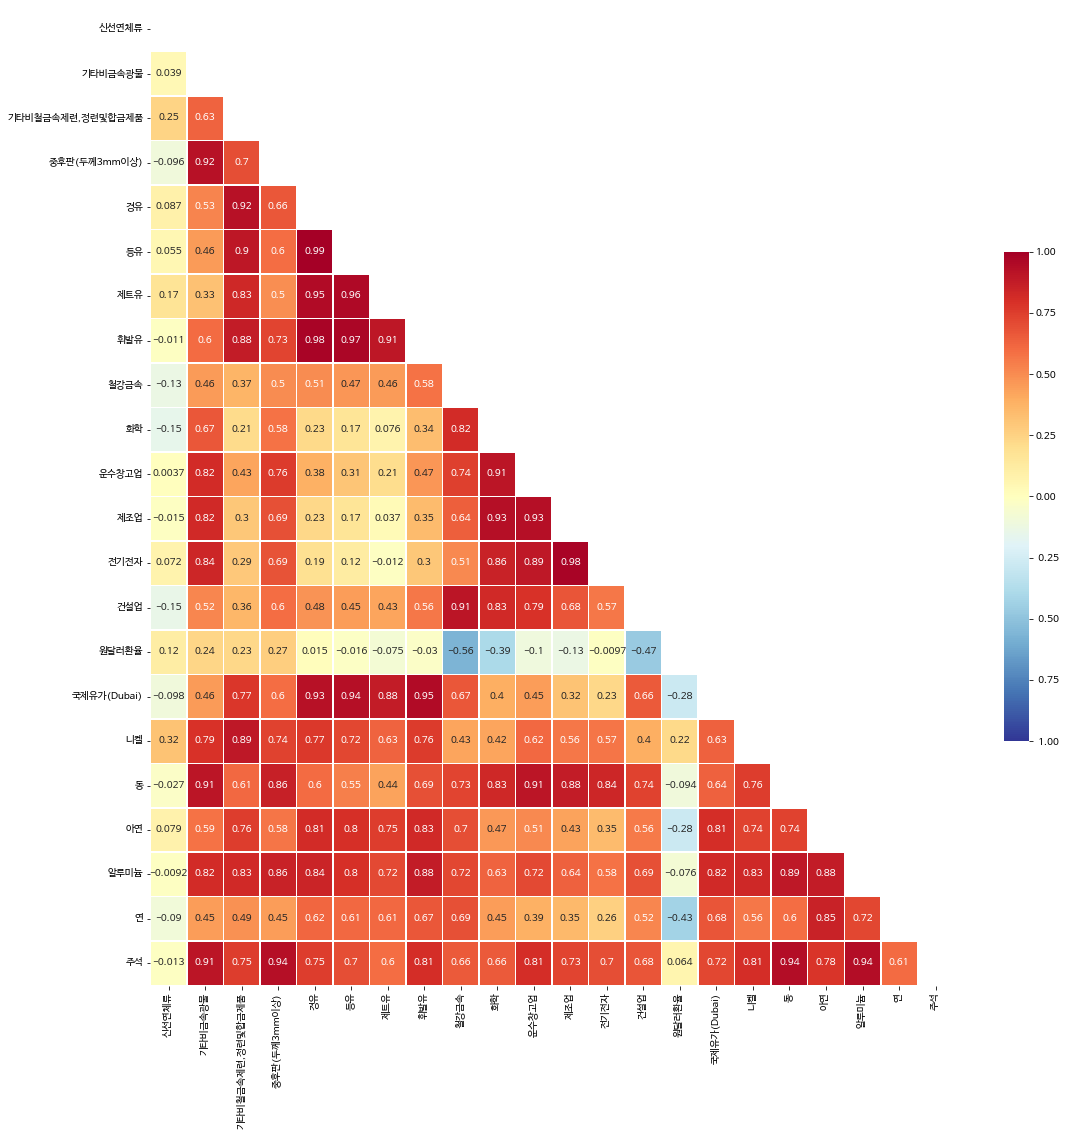

In [64]:
fig, ax = plt.subplots(figsize=(18,18))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_overall.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df_overall.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

- 확인하고자 한 산업들과 원자재가격은 양의 상관관계. 특히, 동,알루미늄,주석과 강한 양의 상관관계
- 국제유가는 석유제품인 경유,등유,제트유,휘발유 생산자물가지수와 아주 강한 상관관계
- 그에 반해, 국제유가 및 석유제품의 생산자물가지수와 산업별 주가지수와는 약한 양의 상관관계. (국제유가가 철강금속과, 건설업에서만 중간정도의 양의 상관관계)
- 환율은 산업별 주가지수와 음의 상관관계 (즉, 환율이 오르면 증시 투자자들 및 회사에 부정적?)

## 2. 환율, 원자재(비금속광물,비철금속가격) -- KOSPI 철강금속 주가 지수

In [77]:
df1=pd.merge(df_KrwUsd_since18, df_minerals.loc[:,['동','알루미늄','주석']], on='시점')
df1=pd.merge(df1, df_ind6Index.loc[:,['철강금속']], on='시점')
df1

,원달러환율,동,알루미늄,주석,철강금속
시점,,,,,
2018-02-01,1071.0,7027.0,2218.0,21950.0,5489.57
2018-06-01,1076.4,6814.0,2271.0,20675.0,4875.56
2018-08-01,1117.9,6137.0,2036.0,19975.0,4877.01
2018-10-01,1110.2,6172.0,2047.5,18950.0,3972.97
2018-11-01,1139.2,6070.0,1961.0,19105.0,4028.74
2019-02-01,1111.6,6097.5,1872.5,20830.0,4376.72
2019-04-01,1136.1,6498.0,1888.0,21600.0,4246.97
2019-07-01,1156.4,5999.0,1778.0,18900.0,3815.12
2019-08-01,1181.9,5876.0,1757.0,17275.0,3638.72


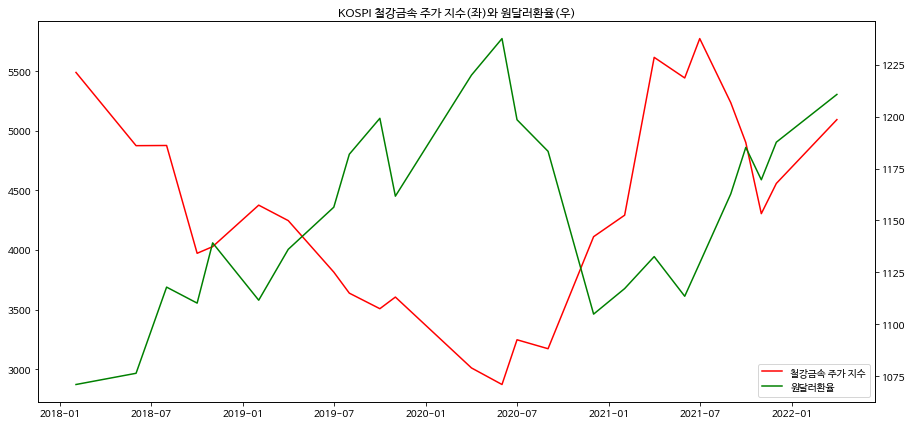

In [88]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(df1.loc[:,['철강금속']], color='red', label="철강금속 주가 지수")
b, =  ax2.plot(df1.loc[:,['원달러환율']], color='green', label="원달러환율")

p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p], loc='lower right')
plt.title('KOSPI 철강금속 주가 지수(좌)와 원달러환율(우)')
plt.show()

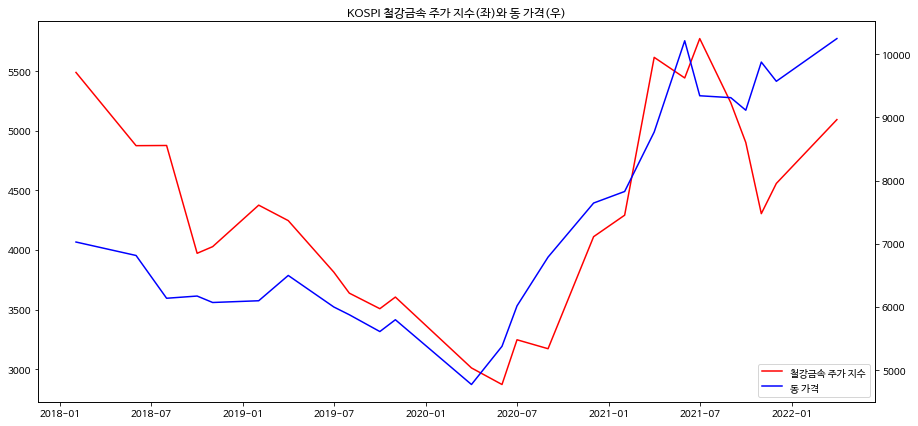

In [90]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(df1.loc[:,['철강금속']], color='red', label="철강금속 주가 지수")
b, =  ax2.plot(df1.loc[:,['동']], color='blue', label="동 가격")

p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p], loc='lower right')
plt.title('KOSPI 철강금속 주가 지수(좌)와 동 가격(우)')
plt.show()

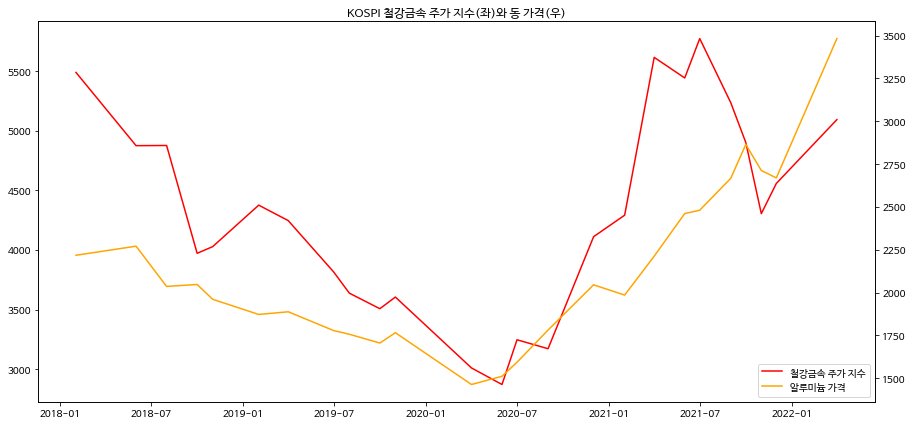

In [92]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(df1.loc[:,['철강금속']], color='red', label="철강금속 주가 지수")
b, =  ax2.plot(df1.loc[:,['알루미늄']], color='orange', label="알루미늄 가격")

p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p], loc='lower right')
plt.title('KOSPI 철강금속 주가 지수(좌)와 동 가격(우)')
plt.show()

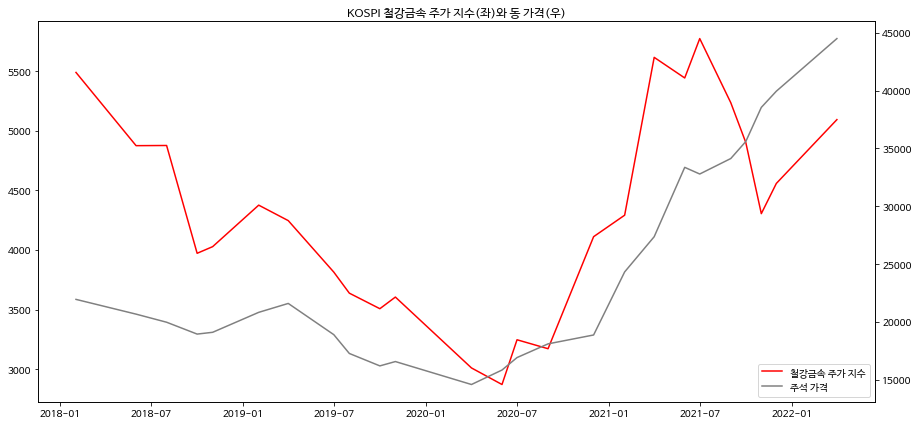

In [94]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(df1.loc[:,['철강금속']], color='red', label="철강금속 주가 지수")
b, =  ax2.plot(df1.loc[:,['주석']], color='grey', label="주석 가격")

p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p], loc='lower right')
plt.title('KOSPI 철강금속 주가 지수(좌)와 동 가격(우)')
plt.show()

## 3. 환율, 원자재(원유) -- KOSPI 화학, 운수창고 주가 지수

In [95]:
df2=pd.merge(df_KrwUsd_since18, df_oil, on='시점')
df2=pd.merge(df2, df_ind6Index.loc[:,['화학']], on='시점')
df2

,원달러환율,국제유가(Dubai),화학
시점,,,
2018-02-01,1071.0,62.7,6074.11
2018-06-01,1076.4,73.6,5792.04
2018-08-01,1117.9,72.5,5625.06
2018-10-01,1110.2,79.4,4646.56
2018-11-01,1139.2,65.6,4887.66
2019-02-01,1111.6,64.6,5275.01
2019-04-01,1136.1,70.9,5133.95
2019-07-01,1156.4,63.3,4525.94
2019-08-01,1181.9,59.1,4369.96


In [96]:
df3=pd.merge(df_KrwUsd_since18, df_oil, on='시점')
df3=pd.merge(df3, df_ind6Index.loc[:,['운수창고업']], on='시점')
df3

,원달러환율,국제유가(Dubai),운수창고업
시점,,,
2018-02-01,1071.0,62.7,1461.37
2018-06-01,1076.4,73.6,1341.21
2018-08-01,1117.9,72.5,1325.65
2018-10-01,1110.2,79.4,1234.62
2018-11-01,1139.2,65.6,1333.94
2019-02-01,1111.6,64.6,1435.11
2019-04-01,1136.1,70.9,1487.28
2019-07-01,1156.4,63.3,1283.44
2019-08-01,1181.9,59.1,1290.76


- 화학 산업

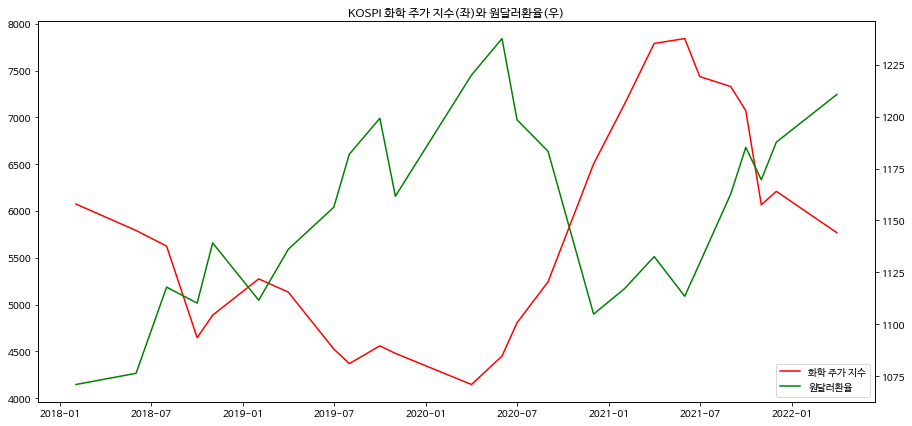

In [97]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(df2.loc[:,['화학']], color='red', label="화학 주가 지수")
b, =  ax2.plot(df2.loc[:,['원달러환율']], color='green', label="원달러환율")

p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p], loc='lower right')
plt.title('KOSPI 화학 주가 지수(좌)와 원달러환율(우)')
plt.show()

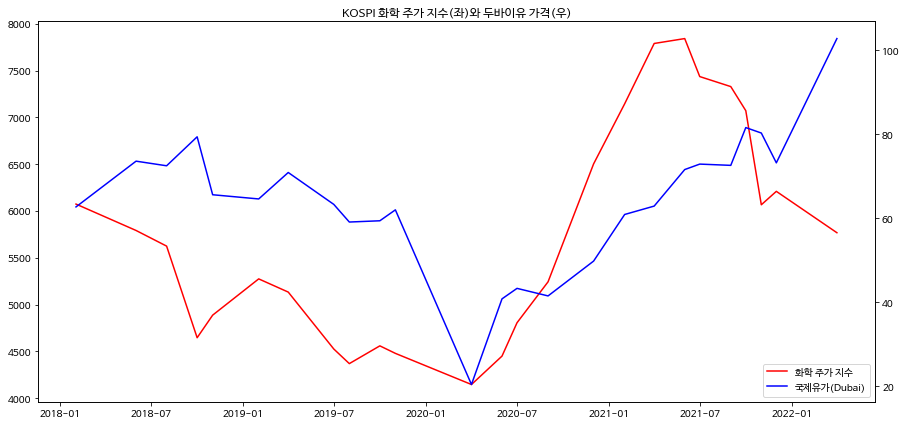

In [98]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(df2.loc[:,['화학']], color='red', label="화학 주가 지수")
b, =  ax2.plot(df2.loc[:,['국제유가(Dubai)']], color='blue', label="국제유가(Dubai)")

p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p], loc='lower right')
plt.title('KOSPI 화학 주가 지수(좌)와 두바이유 가격(우)')
plt.show()

- 운수창고 산업

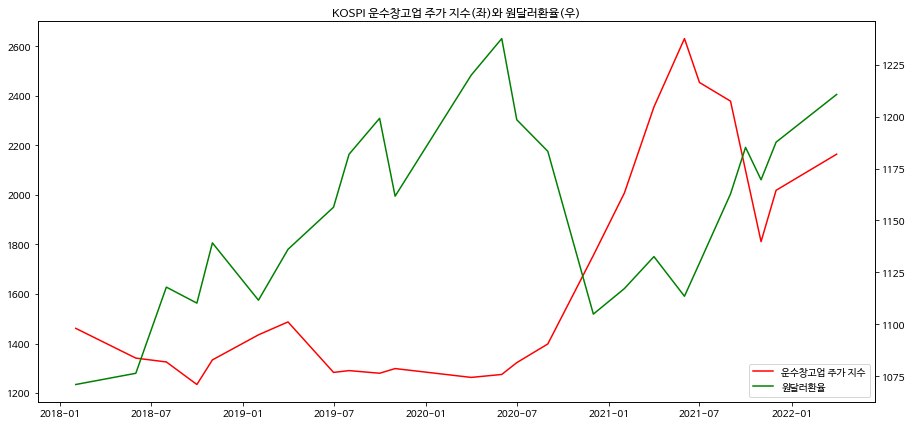

In [99]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(df3.loc[:,['운수창고업']], color='red', label="운수창고업 주가 지수")
b, =  ax2.plot(df3.loc[:,['원달러환율']], color='green', label="원달러환율")

p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p], loc='lower right')
plt.title('KOSPI 운수창고업 주가 지수(좌)와 원달러환율(우)')
plt.show()

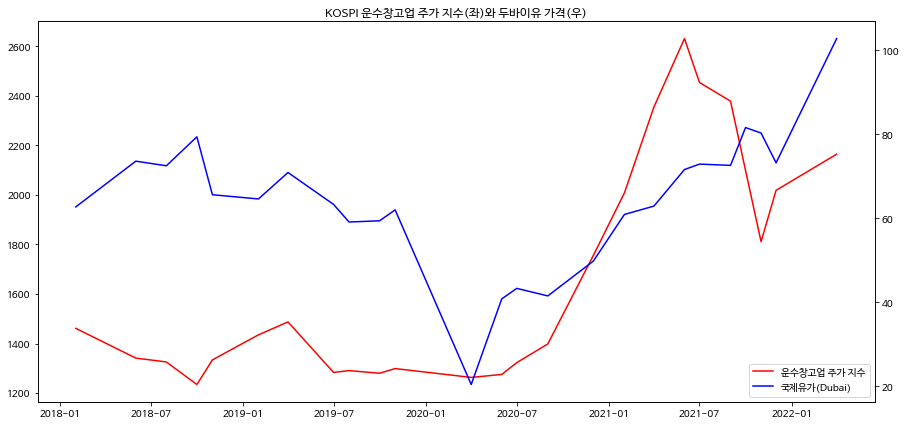

In [100]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(df3.loc[:,['운수창고업']], color='red', label="운수창고업 주가 지수")
b, =  ax2.plot(df3.loc[:,['국제유가(Dubai)']], color='blue', label="국제유가(Dubai)")

p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p], loc='lower right')
plt.title('KOSPI 운수창고업 주가 지수(좌)와 두바이유 가격(우)')
plt.show()